In [1]:
%matplotlib inline

In [28]:
import random
import os
import lucid2
import matplotlib.pyplot as plt
import imageio as iio
import cv2

In [3]:
FRAMES_DIR = '/mnt/maxiv/common/ML-crystals/lyzo1_frames/'

In [4]:
def get_images(d):
    return [os.path.join(d, f) for f in os.listdir(d)]

def get_samples(l, k):
    return sorted(random.sample(l, k), key=lambda f: f[-7:-4])

In [5]:
images = get_images(FRAMES_DIR)
samples = get_samples(images, 10)
samples[:5]

['/mnt/maxiv/common/ML-crystals/lyzo1_frames/frame-022.png',
 '/mnt/maxiv/common/ML-crystals/lyzo1_frames/frame-024.png',
 '/mnt/maxiv/common/ML-crystals/lyzo1_frames/frame-067.png',
 '/mnt/maxiv/common/ML-crystals/lyzo1_frames/frame-077.png',
 '/mnt/maxiv/common/ML-crystals/lyzo1_frames/frame-105.png']

In [6]:
coords = [(s, lucid2.find_loop(s)) for s in samples]
coords

[('/mnt/maxiv/common/ML-crystals/lyzo1_frames/frame-022.png',
  ('Coord', 881, 720)),
 ('/mnt/maxiv/common/ML-crystals/lyzo1_frames/frame-024.png',
  ('Coord', 1265, 713)),
 ('/mnt/maxiv/common/ML-crystals/lyzo1_frames/frame-067.png',
  ('Coord', 1206, 918)),
 ('/mnt/maxiv/common/ML-crystals/lyzo1_frames/frame-077.png',
  ('Coord', 1102, 727)),
 ('/mnt/maxiv/common/ML-crystals/lyzo1_frames/frame-105.png',
  ('Coord', 1199, 998)),
 ('/mnt/maxiv/common/ML-crystals/lyzo1_frames/frame-123.png',
  ('Coord', 1653, 625)),
 ('/mnt/maxiv/common/ML-crystals/lyzo1_frames/frame-128.png',
  ('Coord', 1139, 829)),
 ('/mnt/maxiv/common/ML-crystals/lyzo1_frames/frame-133.png',
  ('Coord', 1166, 16)),
 ('/mnt/maxiv/common/ML-crystals/lyzo1_frames/frame-165.png',
  ('Coord', 1094, 878)),
 ('/mnt/maxiv/common/ML-crystals/lyzo1_frames/frame-169.png',
  ('Coord', 1256, 204))]

In [46]:
coords_found = filter(lambda tup: tup[1][0] == 'Coord', coords)
images = [(tup[0], iio.imread(tup[0]), tup[1])for tup in coords_found]

In [50]:
def plot_all(images):
    i = 1
    fig = plt.figure(figsize=(40, 30))
    for name, img, coord in images:
        print(name)
        ax = fig.add_subplot(4, 4, i)
        ax.imshow(img)
        ax.scatter(coord[1], coord[2], s=50, c='red', marker='o')
        ax.set_title(os.path.basename(name))
        i += 1
    fig.show()

/mnt/maxiv/common/ML-crystals/lyzo1_frames/frame-022.png
/mnt/maxiv/common/ML-crystals/lyzo1_frames/frame-024.png
/mnt/maxiv/common/ML-crystals/lyzo1_frames/frame-067.png
/mnt/maxiv/common/ML-crystals/lyzo1_frames/frame-077.png
/mnt/maxiv/common/ML-crystals/lyzo1_frames/frame-105.png
/mnt/maxiv/common/ML-crystals/lyzo1_frames/frame-123.png
/mnt/maxiv/common/ML-crystals/lyzo1_frames/frame-128.png
/mnt/maxiv/common/ML-crystals/lyzo1_frames/frame-133.png
/mnt/maxiv/common/ML-crystals/lyzo1_frames/frame-165.png
/mnt/maxiv/common/ML-crystals/lyzo1_frames/frame-169.png


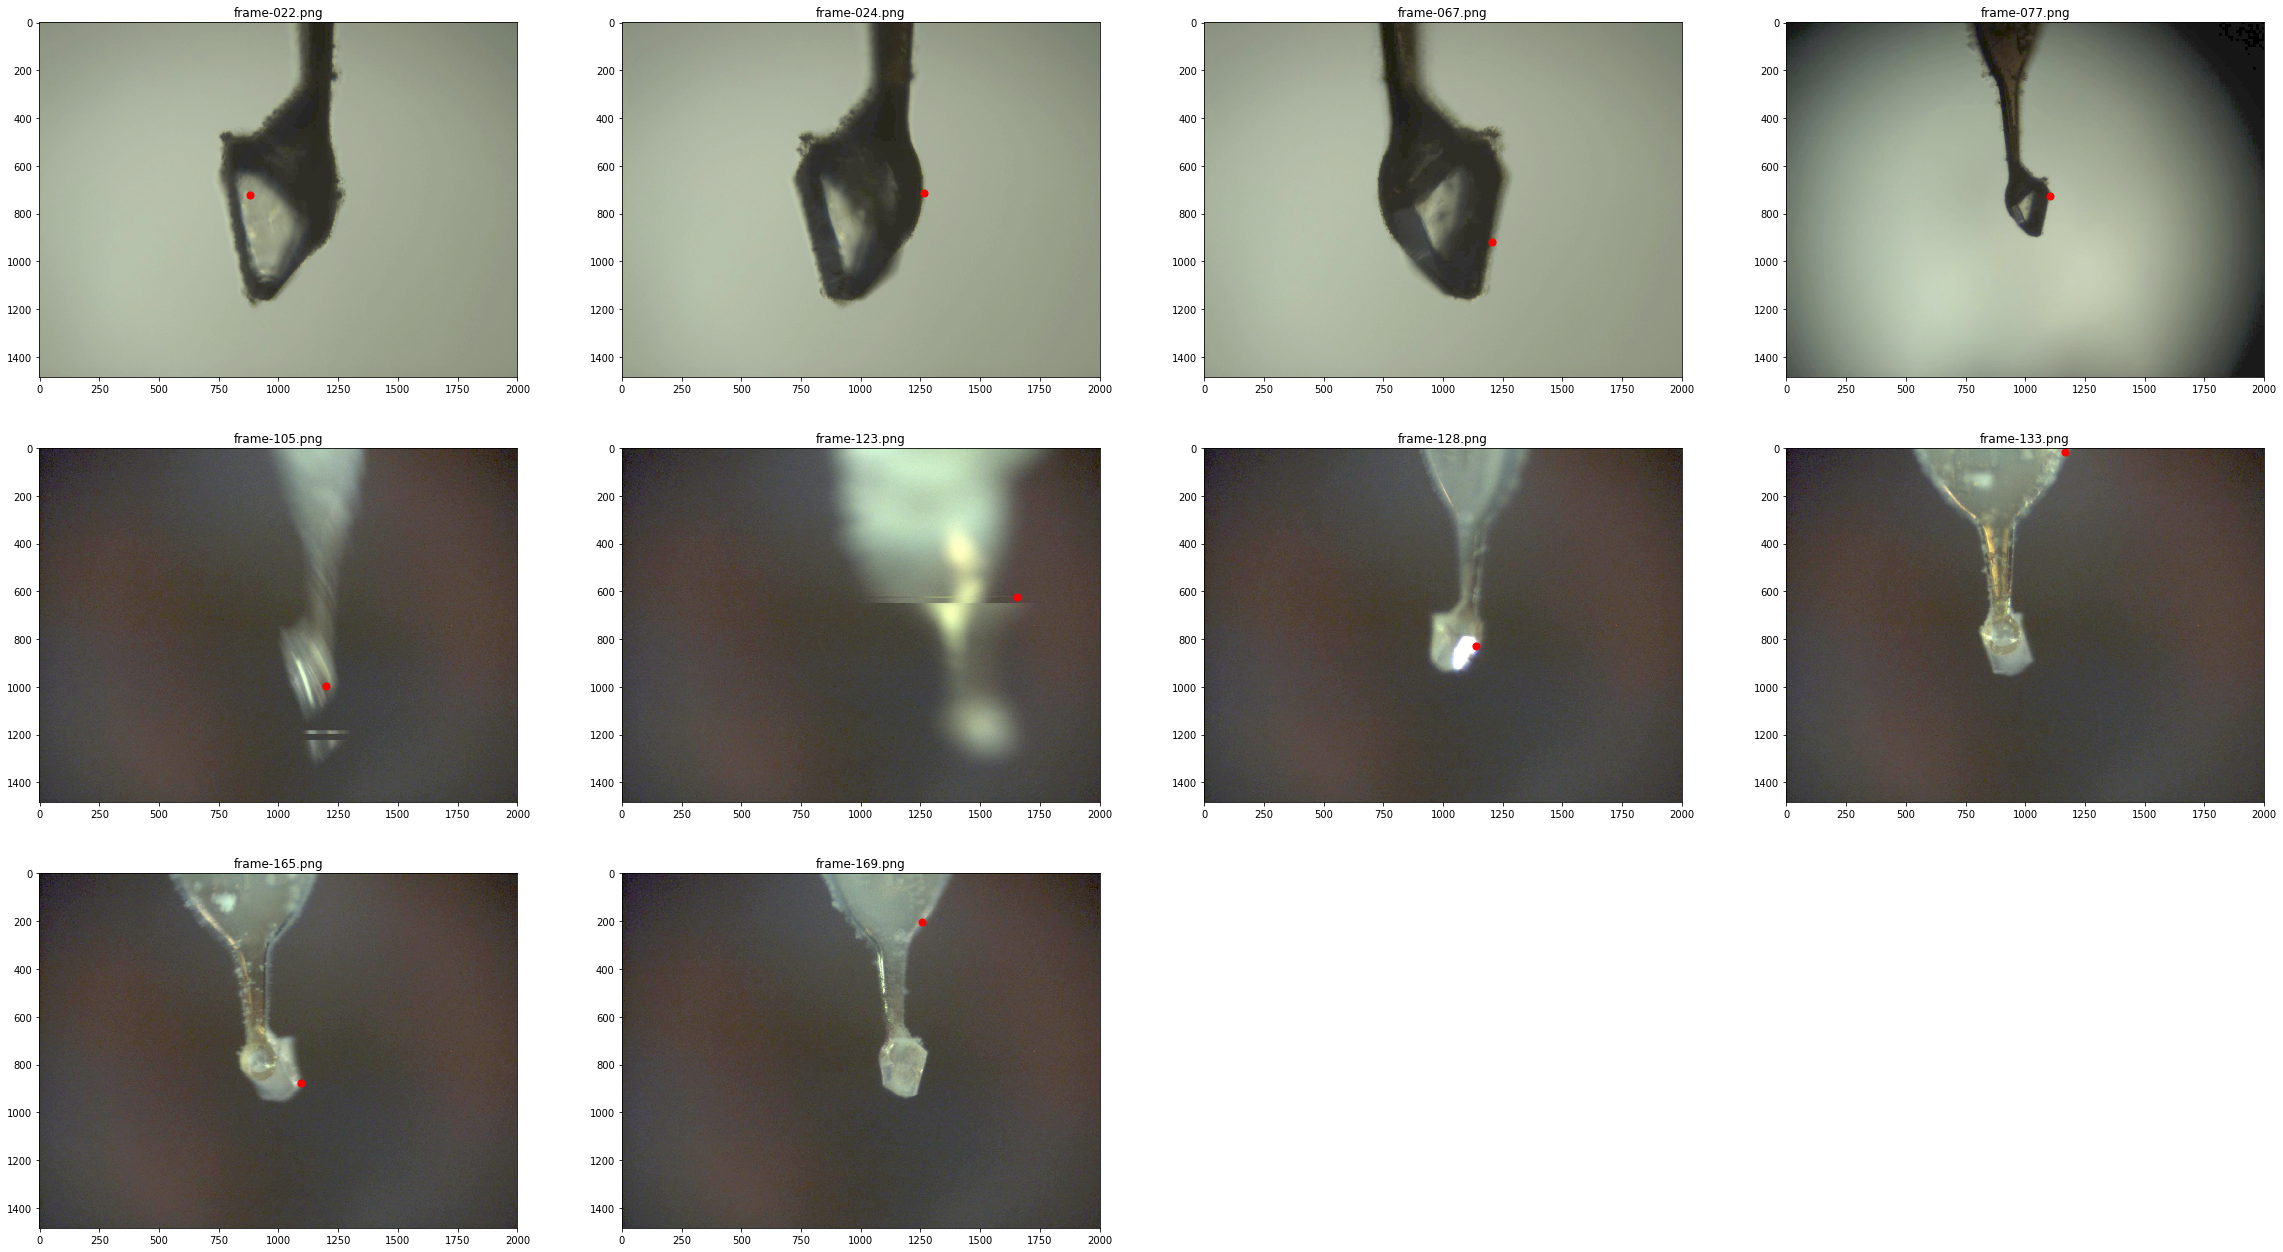

In [51]:
plot_all(images)